### **Proyecto 1 - Consumo Energético**

**Contexto**: Estás trabajando para una ciudad ficticia que busca optimizar su consumo energético y reducir costos. Los datos que analizarás incluirán consumo energético diario (kWh) por distrito, tarifas base, costos por consumo y eventos relevantes (mantenimientos, cortes de energía, actualizaciones). Esto permitirá realizar un análisis integral del consumo y su impacto financiero.

---

### **Tareas**

#### **Generación del Dataset**  
Ya se han generado tres datasets sintéticos que utilizarás:
1. **Consumo Energético por Distrito**:
   - **Columnas**: `date`, `district`, `daily_consumption_kwh`, `temperature_c`, `day_of_week`, `population`.
   - **Descripción**: Incluye datos de consumo energético diario por distrito, influenciados por factores climáticos y demográficos.

2. **Facturación por Distrito**:
   - **Columnas**: `date`, `district`, `base_rate_per_kwh`, `daily_cost`.
   - **Descripción**: Contiene información financiera diaria como tarifas base y costos calculados en función del consumo energético.

3. **Eventos por Distrito**:
   - **Columnas**: `event_date`, `district`, `event_type`, `description`.
   - **Descripción**: Registra eventos relevantes como mantenimientos, cortes de energía y actualizaciones técnicas.

---

#### **Análisis Exploratorio de Datos (EDA)**  
1. Visualizarás tendencias en el consumo energético por distrito.  
2. Investigarás la relación entre temperatura, día de la semana y consumo.  
3. Analizarás el impacto de los eventos en el consumo energético y en los costos asociados.

---

#### **Joins y Enriquecimiento de Datos**  
1. Combinarás los datasets para entender las relaciones entre consumo, costos y eventos.  
2. Identificarás patrones complejos como el impacto de eventos específicos en el costo diario y el consumo energético.

---

#### **Modelado Predictivo**  
1. Implementarás un modelo de regresión para predecir el consumo diario en función de las otras variables.  
2. Evaluarás el desempeño del modelo usando métricas como RMSE o MAE.  
3. Explorarás cómo los eventos pueden influir en los resultados del modelo.

---

#### **Recomendaciones**  
1. Redactarás al menos tres recomendaciones basadas en los resultados del análisis y el modelo predictivo.  
2. Considerarás tanto la optimización del consumo como la reducción de costos.

---

#### **Subida y Evaluación**  
1. Subirás los datasets procesados, el código del modelo y las visualizaciones para obtener la calificación.  
2. La evaluación incluirá:
   - Calidad del análisis.
   - Correcta implementación de los joins.
   - Desempeño del modelo predictivo.
   - Claridad de las recomendaciones.


## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

## Creación de funciones

In [2]:
def preliminares(data):
    print(data.info())
    print(data.head())

## Importar datos

### Data de consumo de energía

In [3]:
data_consumption = pd.read_csv('./datasets/energy_consumption_dataset.csv')

In [4]:
preliminares(data_consumption)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   3650 non-null   object 
 1   district               3650 non-null   object 
 2   daily_consumption_kwh  3650 non-null   float64
 3   temperature_c          3650 non-null   float64
 4   day_of_week            3650 non-null   object 
 5   population             3650 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 171.2+ KB
None
         date    district  daily_consumption_kwh  temperature_c day_of_week  \
0  2022-01-01  District A                   48.5            1.9    Saturday   
1  2022-01-01  District B                   56.9            3.7    Saturday   
2  2022-01-01  District C                   49.4            0.8    Saturday   
3  2022-01-01  District D                   55.2            0.3    Saturday   
4  2022-01-01 

In [5]:
# Convertir fechas a datetime

data_consumption['date'] = pd.to_datetime(data_consumption['date'])

In [6]:
data_consumption.describe()

,date,daily_consumption_kwh,temperature_c,population
count,3650,3650.000000,3650.000000,3650.000000
mean,2022-12-31 12:00:00,45.160384,15.001233,13000.000000
min,2022-01-01 00:00:00,14.500000,0.000000,8000.000000
25%,2022-07-02 00:00:00,31.000000,5.700000,10000.000000
50%,2022-12-31 12:00:00,41.400000,15.300000,12000.000000
75%,2023-07-02 00:00:00,55.500000,22.800000,15000.000000
max,2023-12-31 00:00:00,104.700000,35.000000,20000.000000
std,NaN,19.049388,9.750368,4195.810201


## Analisis de la tabla data_consumption

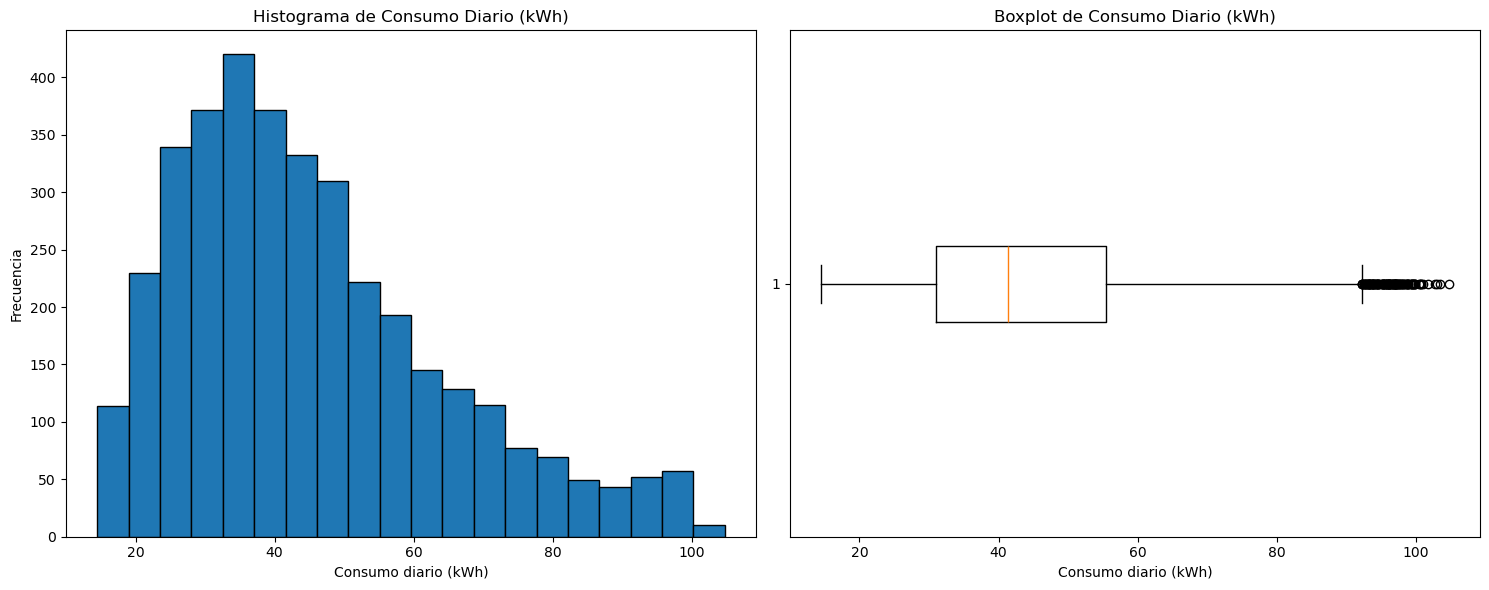

In [ ]:
# Distribución de datos en subplots horizontales
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histograma en el primer subplot
axs[0].hist(data_consumption['daily_consumption_kwh'], edgecolor='black', bins=20)
axs[0].set_title('Histograma de Consumo Diario (kWh)')
axs[0].set_xlabel('Consumo diario (kWh)')
axs[0].set_ylabel('Frecuencia')

# Boxplot en el segundo subplot
axs[1].boxplot(data_consumption['daily_consumption_kwh'], vert=False)
axs[1].set_title('Boxplot de Consumo Diario (kWh)')
axs[1].set_xlabel('Consumo diario (kWh)')

plt.tight_layout()
plt.show()

Los datos estan sesgados hacia la derecha, por lo que se necesita identificar la razon de la desviacion de los datos.